In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<Axes: xlabel='placement_exam_marks', ylabel='Count'>

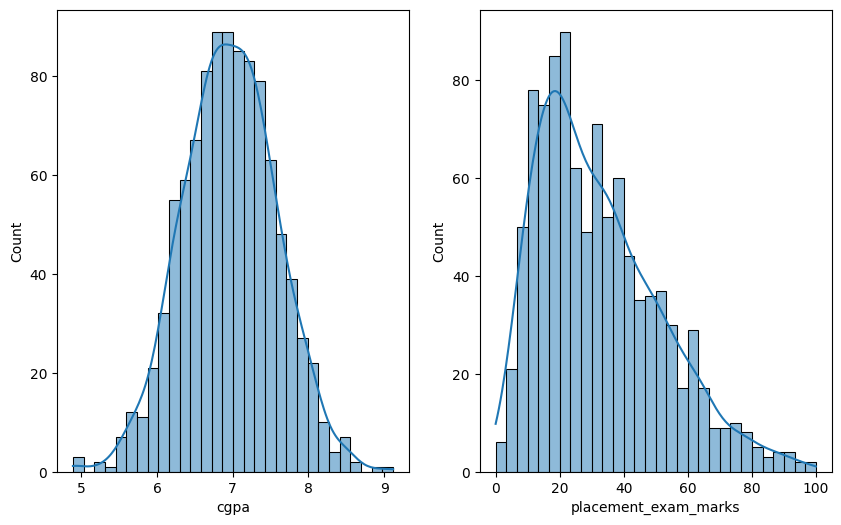

In [18]:
fig, axs = plt.subplots(1, 2, figsize = (10, 6))
# plt.subplot(121)
sns.histplot(df['cgpa'], ax = axs[0], bins = 30, kde = True, palette = 'winter')
# plt.subplot(122)
sns.histplot(df['placement_exam_marks'], ax = axs[1], bins = 30, kde = True, palette = 'winter')


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

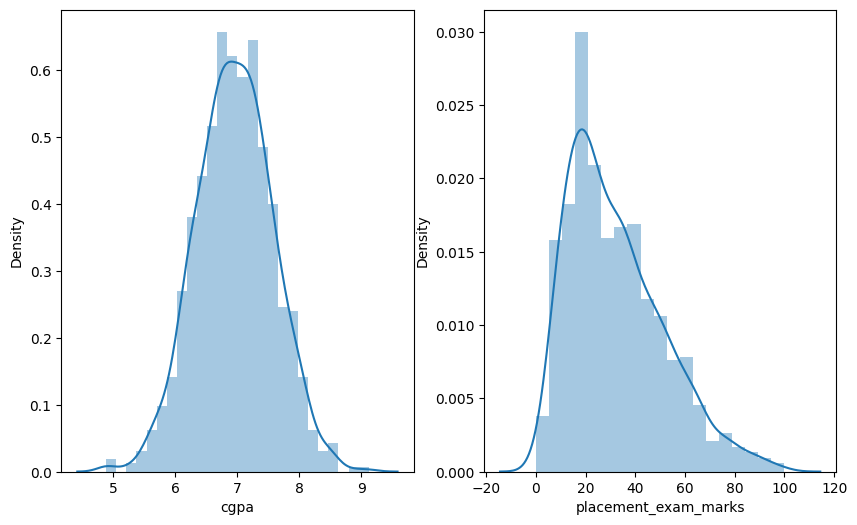

In [19]:
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)    
sns.distplot(df['cgpa'])
plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

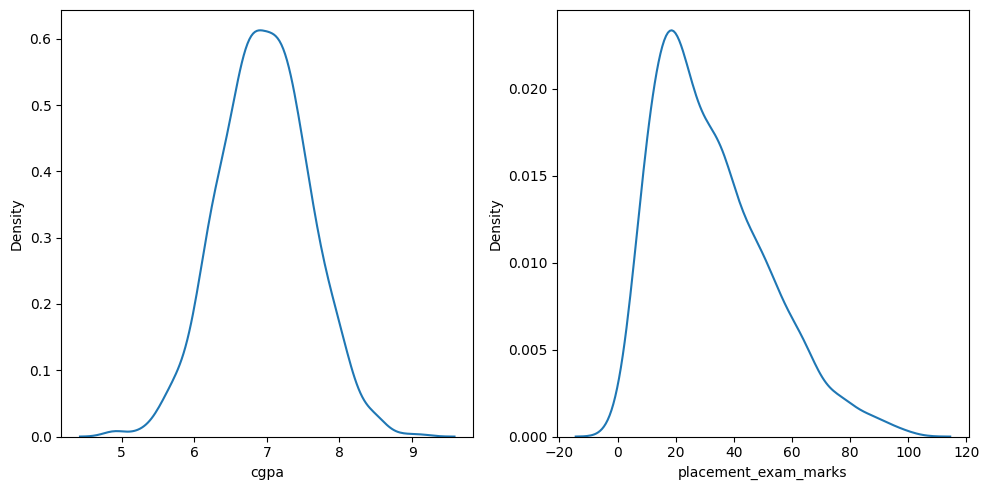

In [20]:
plt, axs = plt.subplots(1, 2, figsize = (10, 5))
sns.kdeplot(df['cgpa'], ax= axs[0])
sns.kdeplot(df['placement_exam_marks'], ax = axs[1])
plt.tight_layout()

the CGPA column is actually normally distributed   
but the placement_exam_marks are actually sckewed 

Hence for CGPA we can use the z-score method for the outlier removal

In [21]:
print("Mean of CGPA : {}".format(np.mean(df['cgpa'])))
print('Min of CGPA : {}'.format(min(df['cgpa'])))
print('Max of CGPA : {}'.format(max(df['cgpa'])))
print('Std Deviation : {}'.format(np.std(df['cgpa'])))

Mean of CGPA : 6.96124
Min of CGPA : 4.89
Max of CGPA : 9.12
Std Deviation : 0.6155898491690712


In [22]:
higher_limit = np.mean(df['cgpa'])+(3*np.std(df['cgpa']))
lower_limit = np.mean(df['cgpa'])-(3*np.std(df['cgpa']))

In [25]:
print('Higher Limit : {}'.format(higher_limit))
print('Lower Limit : {}'.format(lower_limit))

Higher Limit : 8.808009547507213
Lower Limit : 5.114470452492786


In [27]:
df[(df['cgpa'] > 8.80800) | (df['cgpa']< 5.1144)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [29]:
df[(df['cgpa']< higher_limit) & (df['cgpa']> lower_limit)]

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0
